In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LSTM
from tensorflow.keras.optimizers import  Adam

from matplotlib import pyplot
from sklearn.svm import LinearSVC

import numpy as np
import pandas as pd

In [21]:
# al leer el csv interpreta seeds como string, puede ser arreglado con converters y pd.eval
# explode separa las listas en varias filas y problema resuelto
# las filas se incrementan a 117825 rows vs 90001 rows original
df = pd.read_csv('muse_v3.csv', converters={'seeds': pd.eval})
df = df.explode('seeds')

df.head(20)

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,aggressive,6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,aggressive,8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,aggressive,1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,aggressive,13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,fun,13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,sexy,13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,energetic,13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,aggressive,7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal
5,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,aggressive,9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,metal
6,https://www.last.fm/music/kanye%2bwest/_/feedback,Feedback,Kanye West,aggressive,1,3.080000,5.870000,5.490000,NaN,49fT6owWuknekShh9utsjv,hip-hop


In [22]:
# Mostrar la frecuencia de los datos en la columna 'seeds'
frecuencia_seeds = df['seeds'].apply(str).value_counts()

# Imprimir los resultados
print(frecuencia_seeds)


seeds
aggressive    1000
lush          1000
angry         1000
nocturnal     1000
gloomy        1000
              ... 
agreeable        2
sprightly        2
opulent          1
virile           1
hymn-like        1
Name: count, Length: 276, dtype: int64


In [23]:
df.drop(['lastfm_url', 'mbid', 'spotify_id', 'track'], axis=1, inplace=True)
df.dropna(inplace=True)
df


,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre
0,Eminem,aggressive,6,4.550000,5.273125,5.690625,rap
1,Metallica,aggressive,8,3.710000,5.833000,5.427250,metal
2,Rick Ross,aggressive,1,3.080000,5.870000,5.490000,rap
3,M.I.A.,aggressive,13,6.555071,5.537214,5.691357,hip-hop
3,M.I.A.,fun,13,6.555071,5.537214,5.691357,hip-hop
...,...,...,...,...,...,...,...
89993,Ethereal Universe,transparent,1,5.370000,3.450000,5.330000,ambient
89994,Diana Ross,transparent,2,5.760000,3.875000,5.005000,pop
89995,重松俊一,transparent,1,5.370000,3.450000,5.330000,video game music
89997,Omar Rodriguez-Lopez,transparent,4,5.797887,4.132254,5.570563,progressive rock


In [24]:
print(df['genre'].unique())

['rap' 'metal' 'hip-hop' 'nu metal' 'singer-songwriter' 'punk'
 'industrial' 'metalcore' 'alternative metal' 'classic rock'
 'electroclash' 'rock' 'post-hardcore' 'progressive metal' 'indie rock'
 'indie pop' 'indie' 'pop' 'post-punk' 'thrash metal' 'soundtrack'
 'industrial metal' 'gothic metal' 'death metal' 'alternative rock'
 'screamo' 'noise rock' 'electronic' 'riot grrrl' 'electro'
 'symphonic metal' 'grunge' 'trip-hop' 'hard rock' 'breakbeat'
 'melodic death metal' 'hip hop' 'hardcore' 'alternative' 'experimental'
 'country' 'underground hip hop' 'stoner rock' 'horrorcore' 'ska'
 'black metal' 'dark electro' 'redneck' 'hardcore punk' 'stoner metal'
 'ambient' 'math rock' 'grindcore' 'doom metal' 'noise pop' 'emo'
 'deathcore' 'russian chanson' 'ebm' 'j-rock' 'post-metal' 'goth'
 'bluegrass' 'british' 'mathcore' 'christian metal' 'soul'
 'industrial rock' 'folk' 'k-pop' 'digital hardcore' 'post-rock' 'jazz'
 'visual kei' 'dance' 'britpop' 'german' 'folk metal' 'blues rock'
 'melo

In [25]:
df['genre'].value_counts()

genre
indie           10500
rock             9464
electronic       7695
pop              6526
soundtrack       4092
                ...  
hypnosis            1
fidget house        1
arabic jazz         1
ranchera            1
tex-mex             1
Name: count, Length: 811, dtype: int64

In [26]:
#obtiene la frecuencia de cada genero y su media
frecuencia_genero = df['genre'].value_counts()

#imprime los resultados
print(frecuencia_genero)

genre
indie           10500
rock             9464
electronic       7695
pop              6526
soundtrack       4092
                ...  
hypnosis            1
fidget house        1
arabic jazz         1
ranchera            1
tex-mex             1
Name: count, Length: 811, dtype: int64


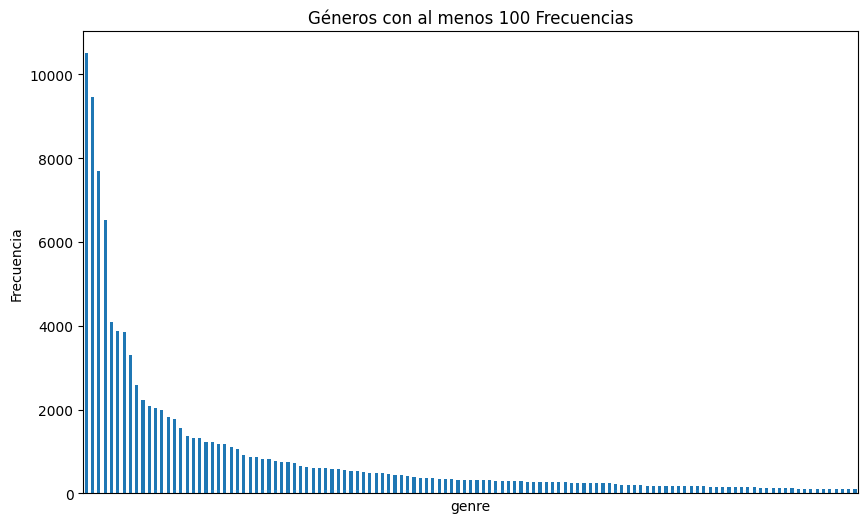

El género menos frecuente entre los seleccionados es "power metal" con 101 frecuencias.
Número de géneros con al menos 100 frecuencias: 123


In [27]:

# Obtener la frecuencia de los géneros
frecuencia_generos = df['genre'].value_counts()

# Seleccionar los géneros que tienen al menos 100 frecuencias
generos_minimo_100_frecuencias = frecuencia_generos[frecuencia_generos >= 100]

# Graficar la frecuencia de los géneros
plt.figure(figsize=(10, 6))
generos_minimo_100_frecuencias.plot(kind='bar')
plt.title(f'Géneros con al menos 100 Frecuencias')
plt.ylabel('Frecuencia')

# Ocultar las etiquetas del eje x
plt.xticks([])

plt.show()

# Encontrar y mostrar el género menos frecuente entre los seleccionados
genero_menos_frecuente = generos_minimo_100_frecuencias.idxmin()
frecuencia_menos_frecuente = generos_minimo_100_frecuencias.min()
print(f'El género menos frecuente entre los seleccionados es "{genero_menos_frecuente}" con {frecuencia_menos_frecuente} frecuencias.')

# Mostrar la cantidad de géneros seleccionados
print(f'Número de géneros con al menos 100 frecuencias: {len(generos_minimo_100_frecuencias)}')


In [28]:
conteo_generos = df['genre'].value_counts()

# Filtrar solo los géneros con 1000 o más entradas
generos_mayor_100 = conteo_generos[conteo_generos >= 100]

# Obtener el número mínimo de entradas entre los géneros seleccionados
min_entradas = generos_mayor_100.min()

# Filtrar el DataFrame original para incluir solo los géneros seleccionados
df_filtrado = df[df['genre'].isin(generos_mayor_100.index)]

# Ajustar la cantidad de entradas para que todos los géneros tengan la misma cantidad
df_ajustado = df_filtrado.groupby('genre').apply(lambda x: x.sample(min_entradas)).reset_index(drop=True)

# Verificar el nuevo conteo de entradas por género
print(df_ajustado['genre'].value_counts())

genre
acoustic          101
power metal       101
post-punk         101
post-hardcore     101
pop punk          101
                 ... 
electronic        101
electro           101
ebm               101
easy listening    101
worship           101
Name: count, Length: 123, dtype: int64


In [29]:
#resetea el indice
df_ajustado.reset_index(drop=True, inplace=True)
df_ajustado


,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre
0,Sam Phillips,quiet,6,6.932632,3.953684,6.153684,acoustic
1,Howie Day,atmospheric,17,6.177759,3.330000,6.084080,acoustic
2,Jim O'Rourke,playful,5,5.936667,4.163333,5.906667,acoustic
3,Suzanne Vega,bright,3,6.973333,4.246667,6.410000,acoustic
4,Jack Johnson,mellow,10,6.356552,3.140345,6.478851,acoustic
...,...,...,...,...,...,...,...
12418,Superchic[k],searching,16,6.516875,4.123750,6.096250,worship
12419,Planetshakers,spiritual,3,5.843551,4.044638,5.185870,worship
12420,Tim Hughes,uplifting,2,6.123653,4.149102,5.492515,worship
12421,Nicole Mordeman,reverent,2,5.505000,3.830000,4.790000,worship


In [30]:
from sklearn import preprocessing
#pasa todas las columnas a numeros
# df_ajustado = df_ajustado.drop(['seeds', 'artist', 'number_of_emotion_tags'], axis=1).reset_index(drop=True)
df_ajustado = df_ajustado.drop(['artist'], axis=1).reset_index(drop=True)
le = preprocessing.LabelEncoder()
# for column in df_ajustado.columns:
#     df_ajustado[column] = le.fit_transform(df_ajustado[column])

df_ajustado

,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre
0,quiet,6,6.932632,3.953684,6.153684,acoustic
1,atmospheric,17,6.177759,3.330000,6.084080,acoustic
2,playful,5,5.936667,4.163333,5.906667,acoustic
3,bright,3,6.973333,4.246667,6.410000,acoustic
4,mellow,10,6.356552,3.140345,6.478851,acoustic
...,...,...,...,...,...,...
12418,searching,16,6.516875,4.123750,6.096250,worship
12419,spiritual,3,5.843551,4.044638,5.185870,worship
12420,uplifting,2,6.123653,4.149102,5.492515,worship
12421,reverent,2,5.505000,3.830000,4.790000,worship


In [40]:
df_ajustado['genre'] = le.fit_transform(df_ajustado['genre'])
df_ajustado['seeds'] = le.fit_transform(df_ajustado['seeds'])


In [32]:
#datos todas las columnas menos valence_tags
def get_datos(categoria):
    scaler = preprocessing.StandardScaler()
    etiquetas = df_ajustado[categoria]
    datos = df_ajustado.drop([categoria], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(datos, etiquetas, train_size=0.8, shuffle=True)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Convertir las etiquetas a one-hot encoding
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return x_train, x_test, y_train, y_test



In [33]:
from keras.optimizers import SGD

def get_moddelo(x_train, x_test, y_train, y_test):
    # Crear el modelo
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    #model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=5e-3, momentum=0.8),metrics=['accuracy'])
    model_fit = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), batch_size=32)
    return model, model_fit

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier


In [35]:
def decision_tree(model, x_train, x_test, y_train, y_test):
    model = DecisionTreeClassifier()
    model = model.fit(x_train, y_train)
    model.score(x_test, y_test)
    return model

def random_forest(model, x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=256)
    model.fit(x_train, y_train)
    model.score(x_test, y_test)
    return model

In [49]:
model_random_forest = RandomForestClassifier(n_estimators=256)
model_random_forest = model_random_forest.fit(x_train, y_train)
model_random_forest.score(x_test, y_test)

0.8201207243460764

In [37]:
def mostrar_graficos(model, model_fit, x_test, y_test):
    #epoch - perdida
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['loss'])
    plt.xlabel("Perdida")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.show()

    #epoch - acierto
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['accuracy'])
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.show()

    #imprime matriz confusion
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot()

# #ver que pasa con cm


In [45]:
x_train, x_test, y_train, y_test = get_datos("genre")
genre_model, genre_model_fit = get_moddelo(x_train, x_test, y_train, y_test)


Epoch 1/25
311/311 [==============================] - 2s 5ms/step - loss: 4.8140 - accuracy: 0.0105 - val_loss: 4.7981 - val_accuracy: 0.0101
Epoch 2/25
311/311 [==============================] - 1s 4ms/step - loss: 4.7923 - accuracy: 0.0143 - val_loss: 4.7809 - val_accuracy: 0.0249
Epoch 3/25
311/311 [==============================] - 1s 4ms/step - loss: 4.7683 - accuracy: 0.0215 - val_loss: 4.7548 - val_accuracy: 0.0278
Epoch 4/25
 34/311 [==>...........................] - ETA: 0s - loss: 4.7294 - accuracy: 0.0257  

KeyboardInterrupt: 

0.1641851106639839

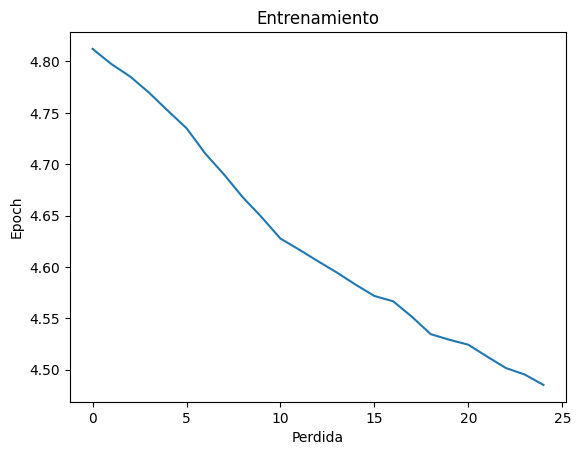

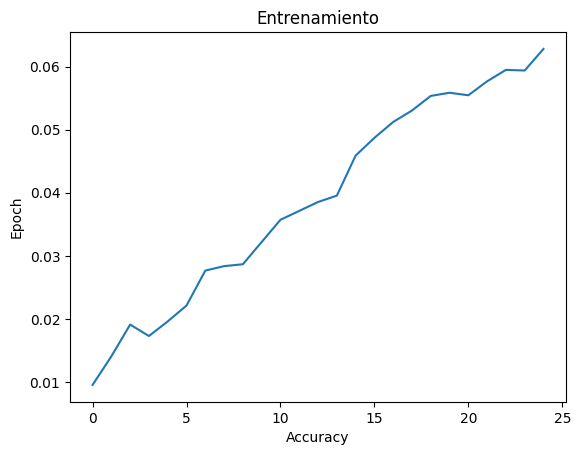

78/78 [==============================] - 0s 813us/step


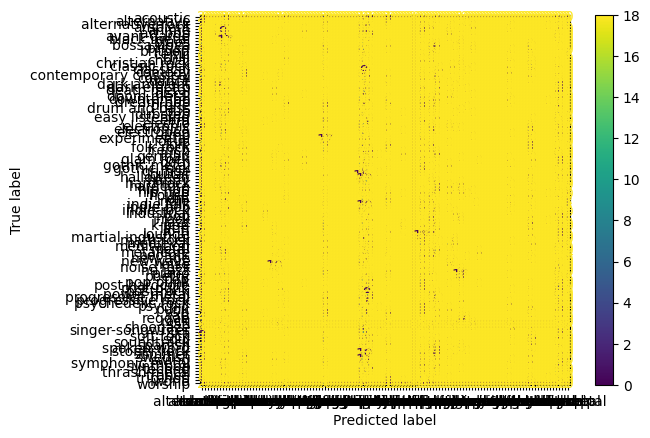

In [ ]:
mostrar_graficos(genre_model, genre_model_fit, x_test, y_test)

In [47]:
x_train, x_test, y_train, y_test = get_datos("dominance_tags")
dominance_tags_model, dominance_tags_model_fit = get_moddelo(x_train, x_test, y_train, y_test)

Epoch 1/25
297/311 [===========================>..] - ETA: 0s - loss: 1.4609 - accuracy: 0.4296

KeyboardInterrupt: 

0.779476861167002

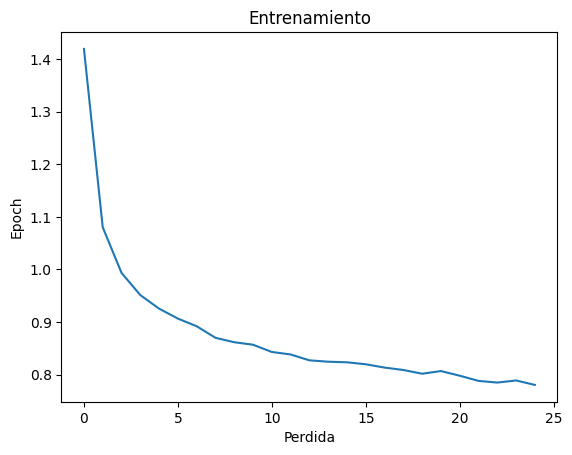

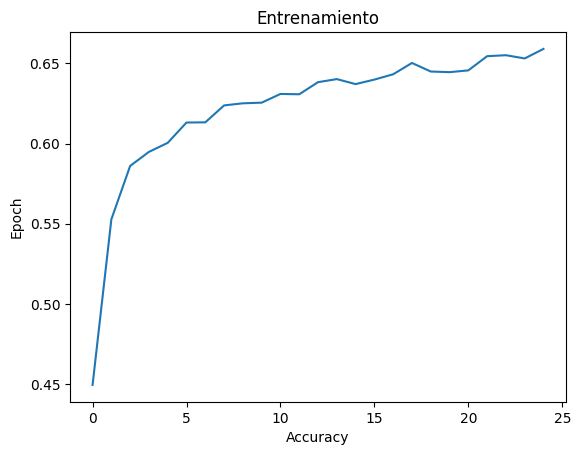

78/78 [==============================] - 0s 1ms/step


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (258).

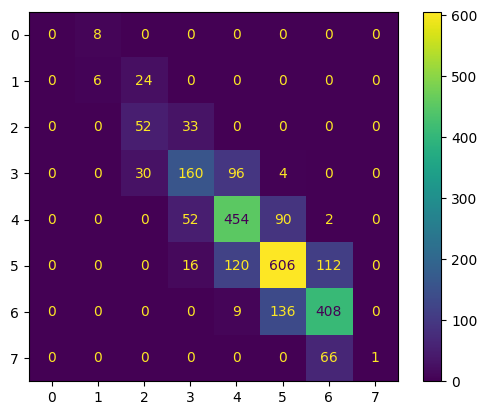

In [43]:
mostrar_graficos(dominance_tags_model, dominance_tags_model_fit, x_test, y_test)

In [ ]:
x_train, x_test, y_train, y_test = get_datos("arousal_tags")
arousal_tags_model, arousal_tags_model_fit = get_moddelo(x_train, x_test, y_train, y_test)

Epoch 1/25
311/311 [==============================] - 2s 5ms/step - loss: 1.6020 - accuracy: 0.3864 - val_loss: 1.4188 - val_accuracy: 0.4370
Epoch 2/25
311/311 [==============================] - 1s 4ms/step - loss: 1.4264 - accuracy: 0.4238 - val_loss: 1.3547 - val_accuracy: 0.4547
Epoch 3/25
311/311 [==============================] - 1s 4ms/step - loss: 1.3844 - accuracy: 0.4325 - val_loss: 1.3262 - val_accuracy: 0.4640
Epoch 4/25
311/311 [==============================] - 1s 4ms/step - loss: 1.3597 - accuracy: 0.4416 - val_loss: 1.3120 - val_accuracy: 0.4728
Epoch 5/25
311/311 [==============================] - 1s 4ms/step - loss: 1.3515 - accuracy: 0.4529 - val_loss: 1.3020 - val_accuracy: 0.4877
Epoch 6/25
311/311 [==============================] - 1s 4ms/step - loss: 1.3349 - accuracy: 0.4584 - val_loss: 1.2911 - val_accuracy: 0.4853
Epoch 7/25
311/311 [==============================] - 1s 4ms/step - loss: 1.3349 - accuracy: 0.4584 - val_loss: 1.2887 - val_accuracy: 0.4841
Epoch 

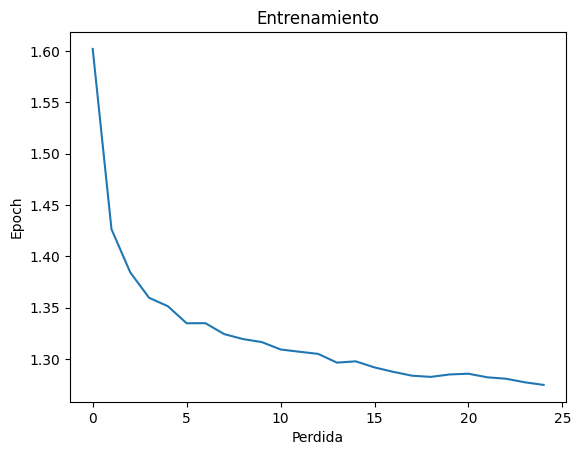

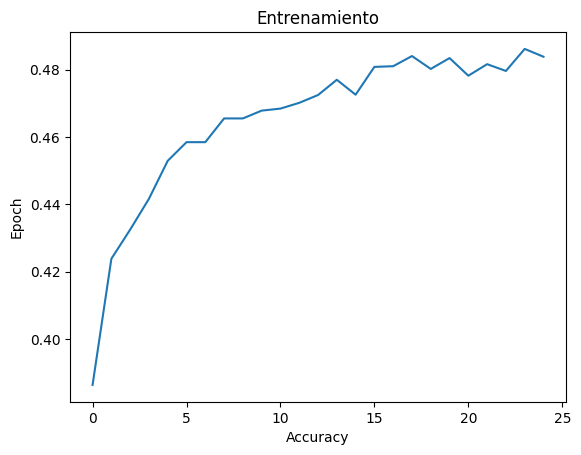

78/78 [==============================] - 0s 1ms/step


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (123).

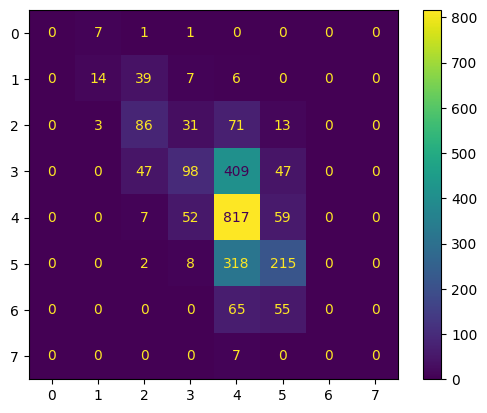

In [ ]:
mostrar_graficos(arousal_tags_model, arousal_tags_model_fit, x_test, y_test)

In [ ]:
x_train, x_test, y_train, y_test = get_datos("valence_tags")
valence_tags_model, valence_tags_model_fit = get_moddelo(x_train, x_test, y_train, y_test)

Epoch 1/25
311/311 [==============================] - 2s 5ms/step - loss: 1.7305 - accuracy: 0.3546 - val_loss: 1.4532 - val_accuracy: 0.4507
Epoch 2/25
311/311 [==============================] - 1s 4ms/step - loss: 1.3875 - accuracy: 0.4365 - val_loss: 1.2958 - val_accuracy: 0.4849
Epoch 3/25
311/311 [==============================] - 1s 4ms/step - loss: 1.2862 - accuracy: 0.4700 - val_loss: 1.2225 - val_accuracy: 0.4930
Epoch 4/25
311/311 [==============================] - 1s 4ms/step - loss: 1.2460 - accuracy: 0.4692 - val_loss: 1.1873 - val_accuracy: 0.4922
Epoch 5/25
311/311 [==============================] - 1s 4ms/step - loss: 1.2155 - accuracy: 0.4923 - val_loss: 1.1628 - val_accuracy: 0.4946
Epoch 6/25
311/311 [==============================] - 1s 4ms/step - loss: 1.2020 - accuracy: 0.4888 - val_loss: 1.1460 - val_accuracy: 0.5095
Epoch 7/25
311/311 [==============================] - 1s 4ms/step - loss: 1.1886 - accuracy: 0.4985 - val_loss: 1.1332 - val_accuracy: 0.5070
Epoch 

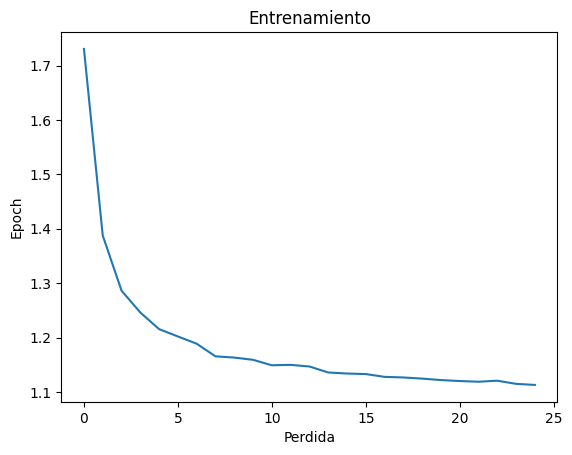

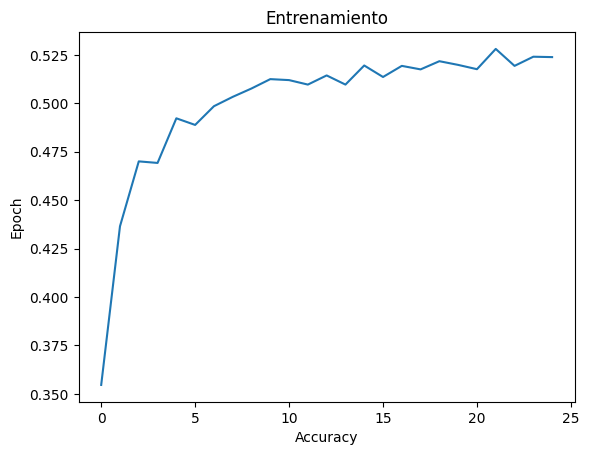

78/78 [==============================] - 0s 755us/step


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (123).

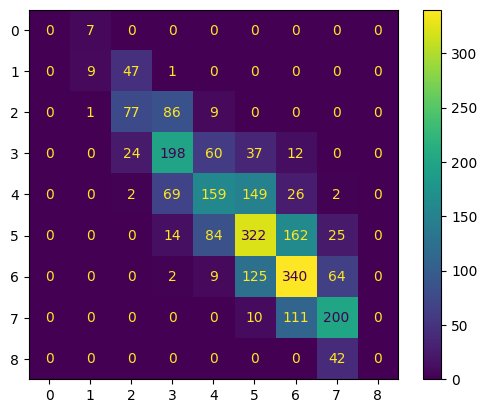

In [ ]:
mostrar_graficos(valence_tags_model, valence_tags_model_fit, x_test, y_test)